In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')

# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

# colours for damage classes
viridis = cm.get_cmap('viridis', 10)
dm_colormap = viridis(range(10))

In [2]:
filename_in = 'V3/low_root_N_damage_two_pfts_stoichastic_e1b5bd9_bf013ef_2021-09-10.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
d2_time = fin.variables['time'][:] / 365.
dmdn2time = len(d2_time)

BA_SCPF = fin.variables['ED_biomass'][:]
AGB_SCPF = fin.variables['AGB_SCPF'][:]
NPP_SCPF = fin.variables['NPP_SCPF'][:]
GPP_SCPF = fin.variables['GPP'][:]

DDBH_CANOPY_SCPF = fin.variables['DDBH_CANOPY_SCPF'][:]
DDBH_UNDERSTORY_SCPF = fin.variables['DDBH_UNDERSTORY_SCPF'][:]
DDBH_CANOPY_CDPF = fin.variables['DDBH_CANOPY_CDPF'][:]
DDBH_UNDERSTORY_CDPF = fin.variables['DDBH_UNDERSTORY_CDPF'][:]


NPLANT_SCPF = fin.variables['NPLANT_SCPF'][:]
NPLANT_CANOPY_SCPF = fin.variables['NPLANT_CANOPY_SCPF'][:]
NPLANT_UNDERSTORY_SCPF = fin.variables['NPLANT_UNDERSTORY_SCPF'][:]
NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]

MORTALITY_CANOPY_SCPF = fin.variables['MORTALITY_CANOPY_SCPF'][:]
MORTALITY_UNDERSTORY_SCPF = fin.variables['MORTALITY_UNDERSTORY_SCPF'][:]
MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]
MORTALITY_UNDERSTORY_CDPF = fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]

fin.close()

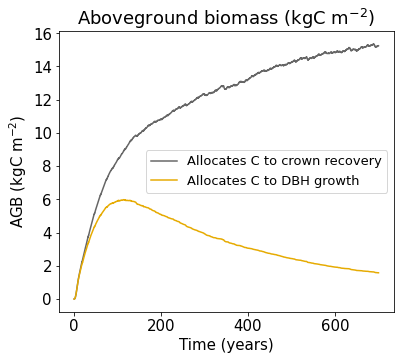

In [5]:
fig1, ((f1ax0)) = plt.subplots(nrows=1,ncols=1, figsize=(6,5))

### AGB
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,30:,:], axis = 1), label = 'Allocates C to crown recovery', 
           color=colormap[7])
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,0:30,:], axis=1), label = 'Allocates C to DBH growth', 
          color=colormap[5])

f1ax0.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f1ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 15)
f1ax0.set_xlabel('Time (years)', fontsize=15)
f1ax0.tick_params(labelsize=15)
f1ax0.legend(prop={'size':13})


plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures_v3/AGB_size_2pfts_graphical_abstract.png", format = 'png', dpi = 300)
    